<a href="https://colab.research.google.com/github/KinataDewa/PCVK_Genap_2024/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

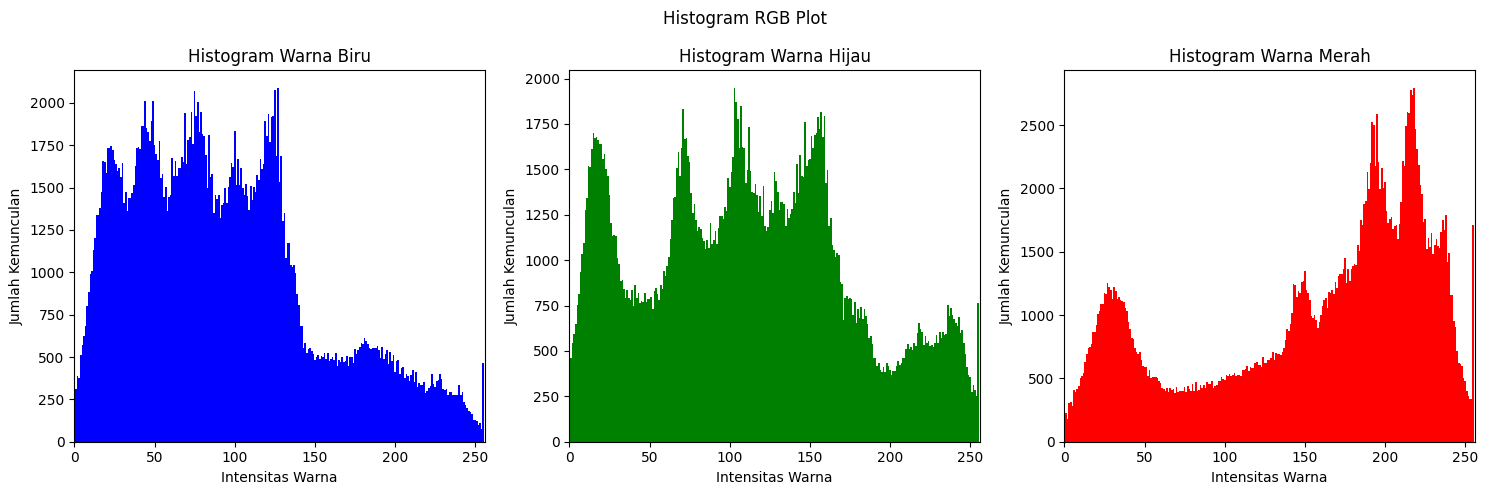

In [4]:
# 3
image_path = '/content/drive/MyDrive/PCVK/lena.jpg'  # Ganti dengan path citra Anda
image = cv.imread(image_path)

# Kanal warna
plt.figure(figsize=(15, 5))

# Kanal warna
colors = ('b', 'g', 'r')
color_names = ('Biru', 'Hijau', 'Merah')

# Membuat subplot untuk masing-masing kanal warna dengan bar
for i, color in enumerate(colors):
    plt.subplot(1, 3, i+1)
    hist = cv.calcHist([image], [i], None, [256], [0, 256])
    plt.bar(np.arange(256), hist.flatten(), color=color, width=1.0)
    plt.title(f'Histogram Warna {color_names[i]}')
    plt.xlabel('Intensitas Warna')
    plt.ylabel('Jumlah Kemunculan')
    plt.xlim([0, 256])

# Menampilkan plot
plt.suptitle('Histogram RGB Plot')
plt.tight_layout()
plt.show()

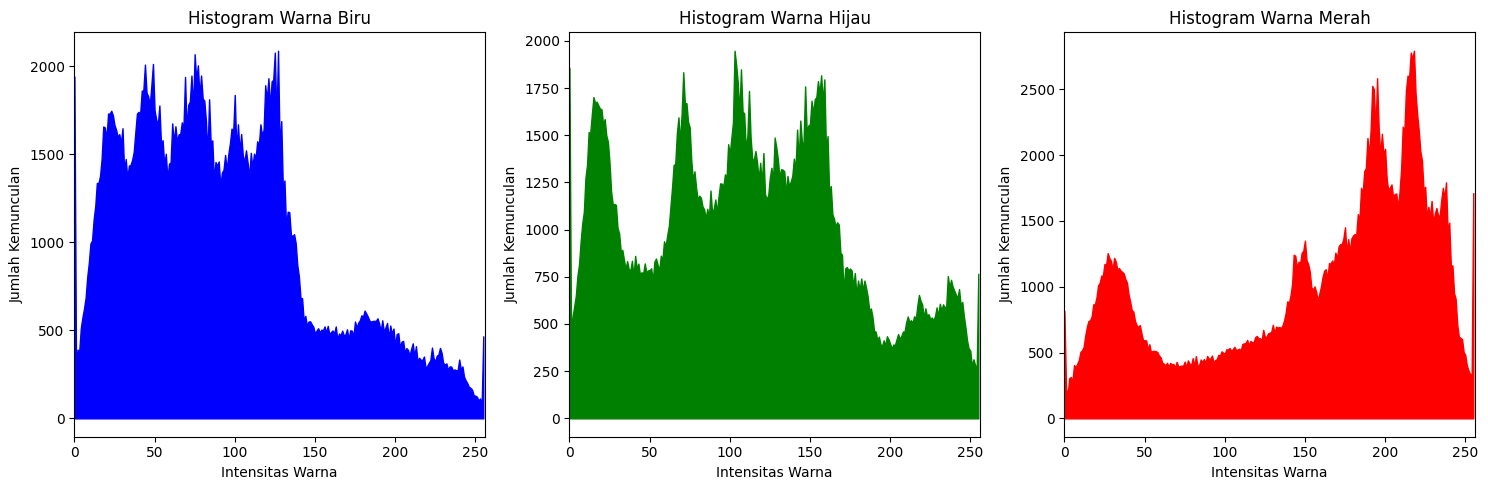

In [5]:
#4
# Mengatur ukuran plot
plt.figure(figsize=(15, 5))

# Kanal warna
colors = ('b', 'g', 'r')
color_names = ('Biru', 'Hijau', 'Merah')

# Membuat subplot untuk masing-masing kanal warna
for i, (color, color_name) in enumerate(zip(colors, color_names)):
    # Memisahkan kanal warna
    channel = image[:, :, i]

    # Menghitung histogram menggunakan NumPy
    hist, bins = np.histogram(channel, bins=256, range=[0, 256])

    # Plot histogram
    plt.subplot(1, 3, i + 1)
    plt.fill_between(bins[:-1], hist, color=color)
    plt.title(f'Histogram Warna {color_name}')
    plt.xlabel('Intensitas Warna')
    plt.ylabel('Jumlah Kemunculan')
    plt.xlim([0, 256])

# Menampilkan plot
plt.tight_layout()
plt.show()

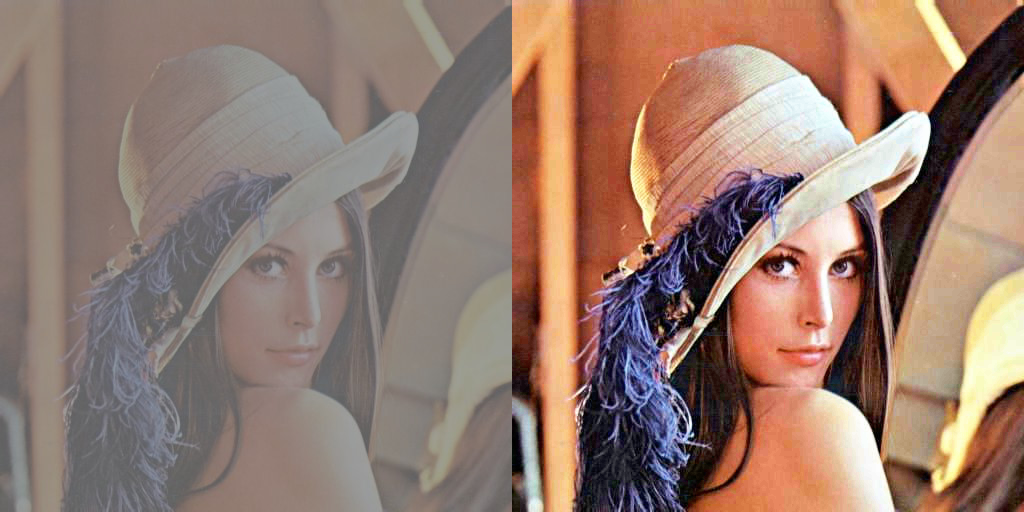

<BarContainer object of 256 artists>

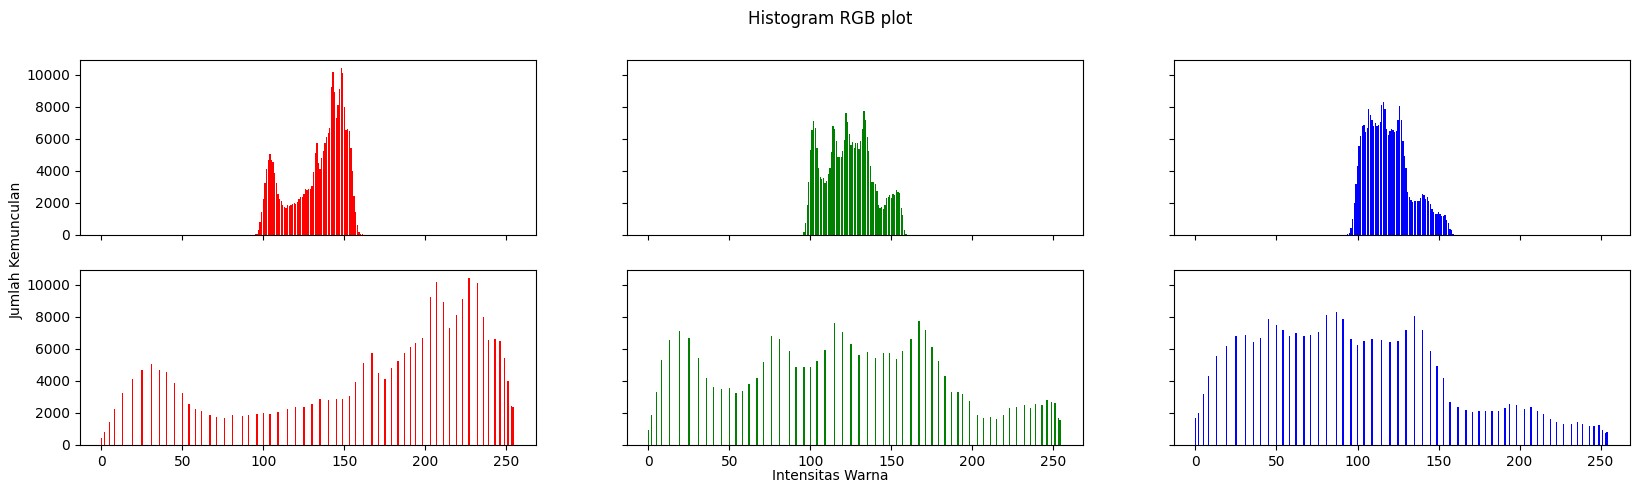

In [7]:
# 5
img1 = cv.imread('/content/drive/MyDrive/PCVK/lena_lc.jpg')
def histog(img1):
  height, width, depth = np.shape(img1)
  ax = np.zeros((3,256))
  for y in range(0,height) :
    for x in range(0,width) :
      ax[0][img1[y][x][0]] += 1
      ax[1][img1[y][x][1]] += 1
      ax[2][img1[y][x][2]] += 1
  return ax

histo_asli = histog(img1)

#convert to Numpy array
img_array = np.asarray(img1)

#Step 1: Normalized cumulative histogram
#flatten image array and calculate histogram via binning
histogram_array = np.bincount(img_array.flatten(), minlength=256)

#normalize
num_pixels = np. sum(histogram_array)
histogram_array = histogram_array/num_pixels

#normalized cumulative histogram
chistogram_array = np.cumsum(histogram_array)

#Step 2: Pixel mapping lookup table
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)

#Step 3: Transformation
# flatten image array into 10 list
img_list = list(img_array.flatten())

# transform pixel values to equalize
eq_img_list = [transform_map[p] for p in img_list]

# reshape and write back into img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv.hconcat((img1, img2)) #concatenate image
cv2_imshow(final_frame)

names = np.arange (256)
fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0,0].bar(names, histo_asli[2], color='red')
axs[0,1].bar(names, histo_asli[1], color='green')
axs[0,2].bar(names, histo_asli[0], color='blue')
axs[1,0].bar(names, equal_histo[2], color='red')
axs[1,1].bar(names, equal_histo[1], color='green')
axs[1,2].bar(names, equal_histo[0], color='blue')

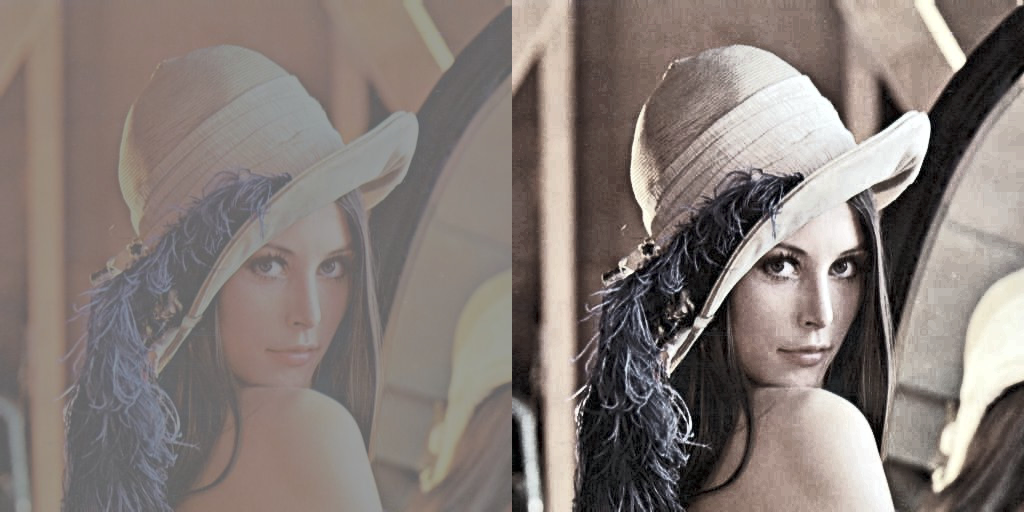

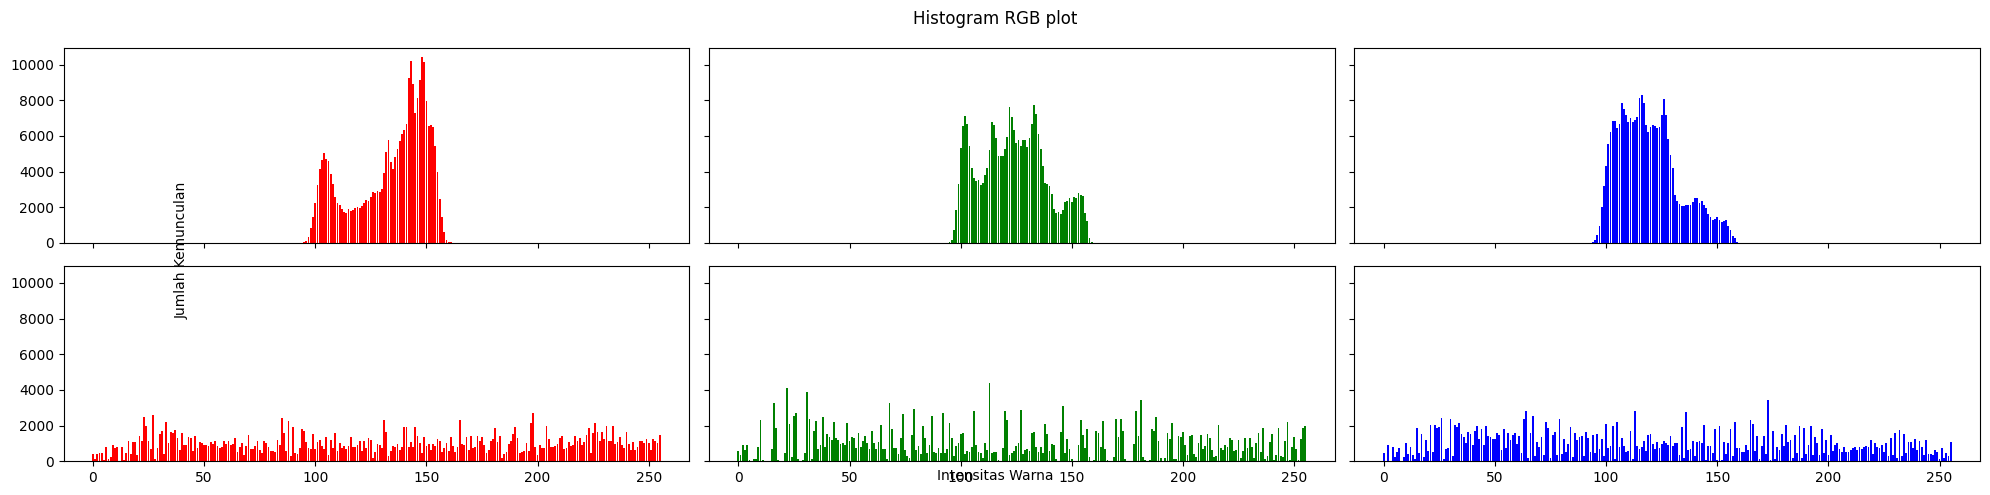

In [8]:
# 6
# Membaca citra
img1 = cv.imread('/content/drive/MyDrive/PCVK/lena_lc.jpg')

# Mengonversi citra ke format LAB untuk mengequalize hanya saluran L
lab = cv.cvtColor(img1, cv.COLOR_BGR2LAB)

# Memisahkan saluran L, A, dan B
l, a, b = cv.split(lab)

# Menggunakan fungsi equalizeHist untuk equalisasi histogram pada saluran L
equalized_l = cv.equalizeHist(l)

# Menggabungkan kembali saluran yang telah di-equalize dengan saluran A dan B
equalized_lab = cv.merge((equalized_l, a, b))

# Mengonversi kembali ke BGR
img2 = cv.cvtColor(equalized_lab, cv.COLOR_LAB2BGR)

# Membuat frame akhir untuk menampilkan citra asli dan yang telah di-equalize
final_frame = cv.hconcat([img1, img2])

# Menampilkan citra hasil menggunakan cv2_imshow (pengganti cv.imshow untuk Colab)
cv2_imshow(final_frame)

# Menghitung histogram untuk masing-masing saluran warna (RGB) dari citra asli dan citra yang di-equalize
names = np.arange(256)

histo_asli_red = cv.calcHist([img1], [2], None, [256], [0, 256])
histo_asli_green = cv.calcHist([img1], [1], None, [256], [0, 256])
histo_asli_blue = cv.calcHist([img1], [0], None, [256], [0, 256])

equal_histo_red = cv.calcHist([img2], [2], None, [256], [0, 256])
equal_histo_green = cv.calcHist([img2], [1], None, [256], [0, 256])
equal_histo_blue = cv.calcHist([img2], [0], None, [256], [0, 256])

# Menampilkan histogram dalam subplot
fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

# Menampilkan histogram untuk citra asli
axs[0, 0].bar(names, histo_asli_red.flatten(), color='red')
axs[0, 1].bar(names, histo_asli_green.flatten(), color='green')
axs[0, 2].bar(names, histo_asli_blue.flatten(), color='blue')

# Menampilkan histogram untuk citra yang telah di-equalize
axs[1, 0].bar(names, equal_histo_red.flatten(), color='red')
axs[1, 1].bar(names, equal_histo_green.flatten(), color='green')
axs[1, 2].bar(names, equal_histo_blue.flatten(), color='blue')

plt.tight_layout()
plt.show()

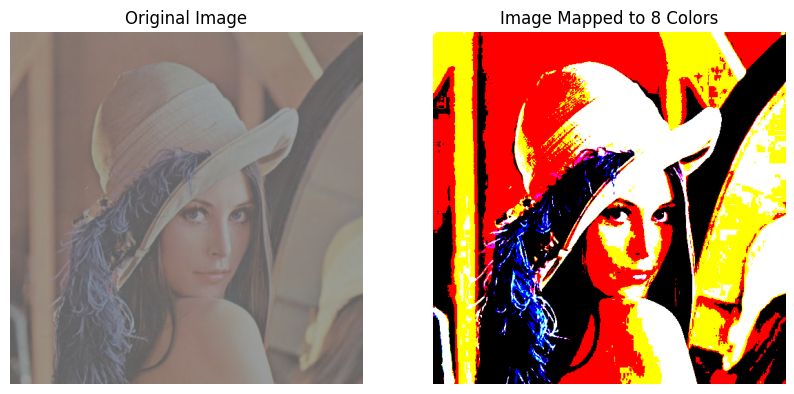

In [9]:
# 7
img_path = "/content/drive/MyDrive/PCVK/lena_lc.jpg"
img = io.imread(img_path)

# mendefinisikan 8 warna dasar (RGB)
color_palette = {
    'black': np.array([0, 0, 0]),
    'white': np.array([255, 255, 255]),
    'red': np.array([255, 0, 0]),
    'green': np.array([0, 255, 0]),
    'blue': np.array([0, 0, 255]),
    'cyan': np.array([0, 255, 255]),
    'magenta': np.array([255, 0, 255]),
    'yellow': np.array([255, 255, 0])
}

# function untuk menghitung jarak antara 2 nilai RGB
def calculate_distance(color1, color2):
    return np.sqrt(np.sum((color1 - color2) ** 2))

# Fungsi untuk melihat warna pixel terdekat dengan yang sudah didefinisikan
def map_color_to_palette(pixel, palette):
    min_distance = float('inf')
    nearest_color = None

    # Compare distance of pixel to each color in the palette
    for color_name, color_value in palette.items():
        distance = calculate_distance(pixel, color_value)
        if distance < min_distance:
            min_distance = distance
            nearest_color = color_value

    return nearest_color

# membuat copy untuk output
mapped_img = np.zeros_like(img)

# perulangan untuk tiap pixel untuk dirubah ke warna terdekat
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        mapped_img[i, j] = map_color_to_palette(img[i, j], color_palette)

# membuat canvas
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(mapped_img)
plt.axis('off')
plt.title('Image Mapped to 8 Colors')

plt.show()

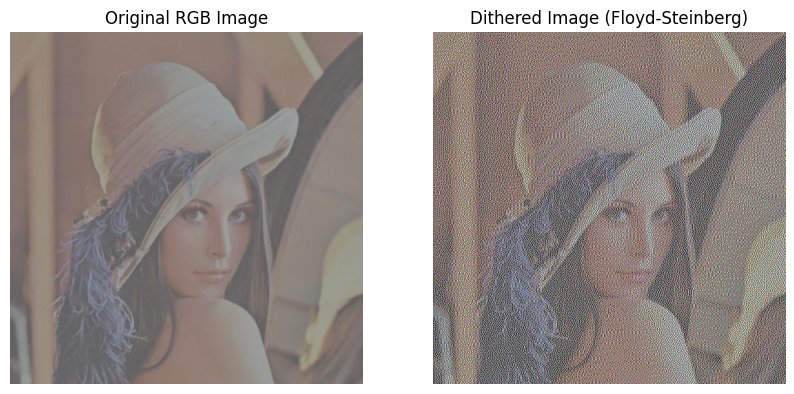

In [10]:
# 8
img_path = "/content/drive/MyDrive/PCVK/lena_lc.jpg"
img = io.imread(img_path)

#  Floyd-Steinberg Dithering untuk RGB
def floyd_steinberg_dithering_rgb(image):
    # Copy image to avoid modifying original image
    img = image.copy().astype(np.float32)  # Konversi ke float untuk penanganan error yang lebih akurat
    h, w, c = img.shape

    # Iterasi setiap channel (R, G, B)
    for y in range(h):
        for x in range(w):
            for channel in range(c):  # Lakukan proses di setiap channel (0=Red, 1=Green, 2=Blue)
                old_pixel = img[y, x, channel]
                new_pixel = np.round(old_pixel / 255) * 255  # Aproksimasi ke 0 atau 255 (warna biner)
                img[y, x, channel] = new_pixel
                error = old_pixel - new_pixel  # Error kuantisasi

                # Sebarkan error ke pixel-pixel tetangga
                if x + 1 < w:
                    img[y, x + 1, channel] += error * 7 / 16
                if y + 1 < h:
                    if x > 0:
                        img[y + 1, x - 1, channel] += error * 3 / 16
                    img[y + 1, x, channel] += error * 5 / 16
                    if x + 1 < w:
                        img[y + 1, x + 1, channel] += error * 1 / 16
    return img.astype(np.uint8)  # Kembalikan hasil sebagai uint8 untuk citra yang valid

# Lakukan dithering pada gambar RGB
dithered_img_rgb = floyd_steinberg_dithering_rgb(img)

# Tampilkan hasil
plt.figure(figsize=(10, 5))

# Tampilkan gambar asli (RGB)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')
plt.title('Original RGB Image')

# Tampilkan gambar setelah dithering
plt.subplot(1, 2, 2)
plt.imshow(dithered_img_rgb)
plt.axis('off')
plt.title('Dithered Image (Floyd-Steinberg)')

plt.show()

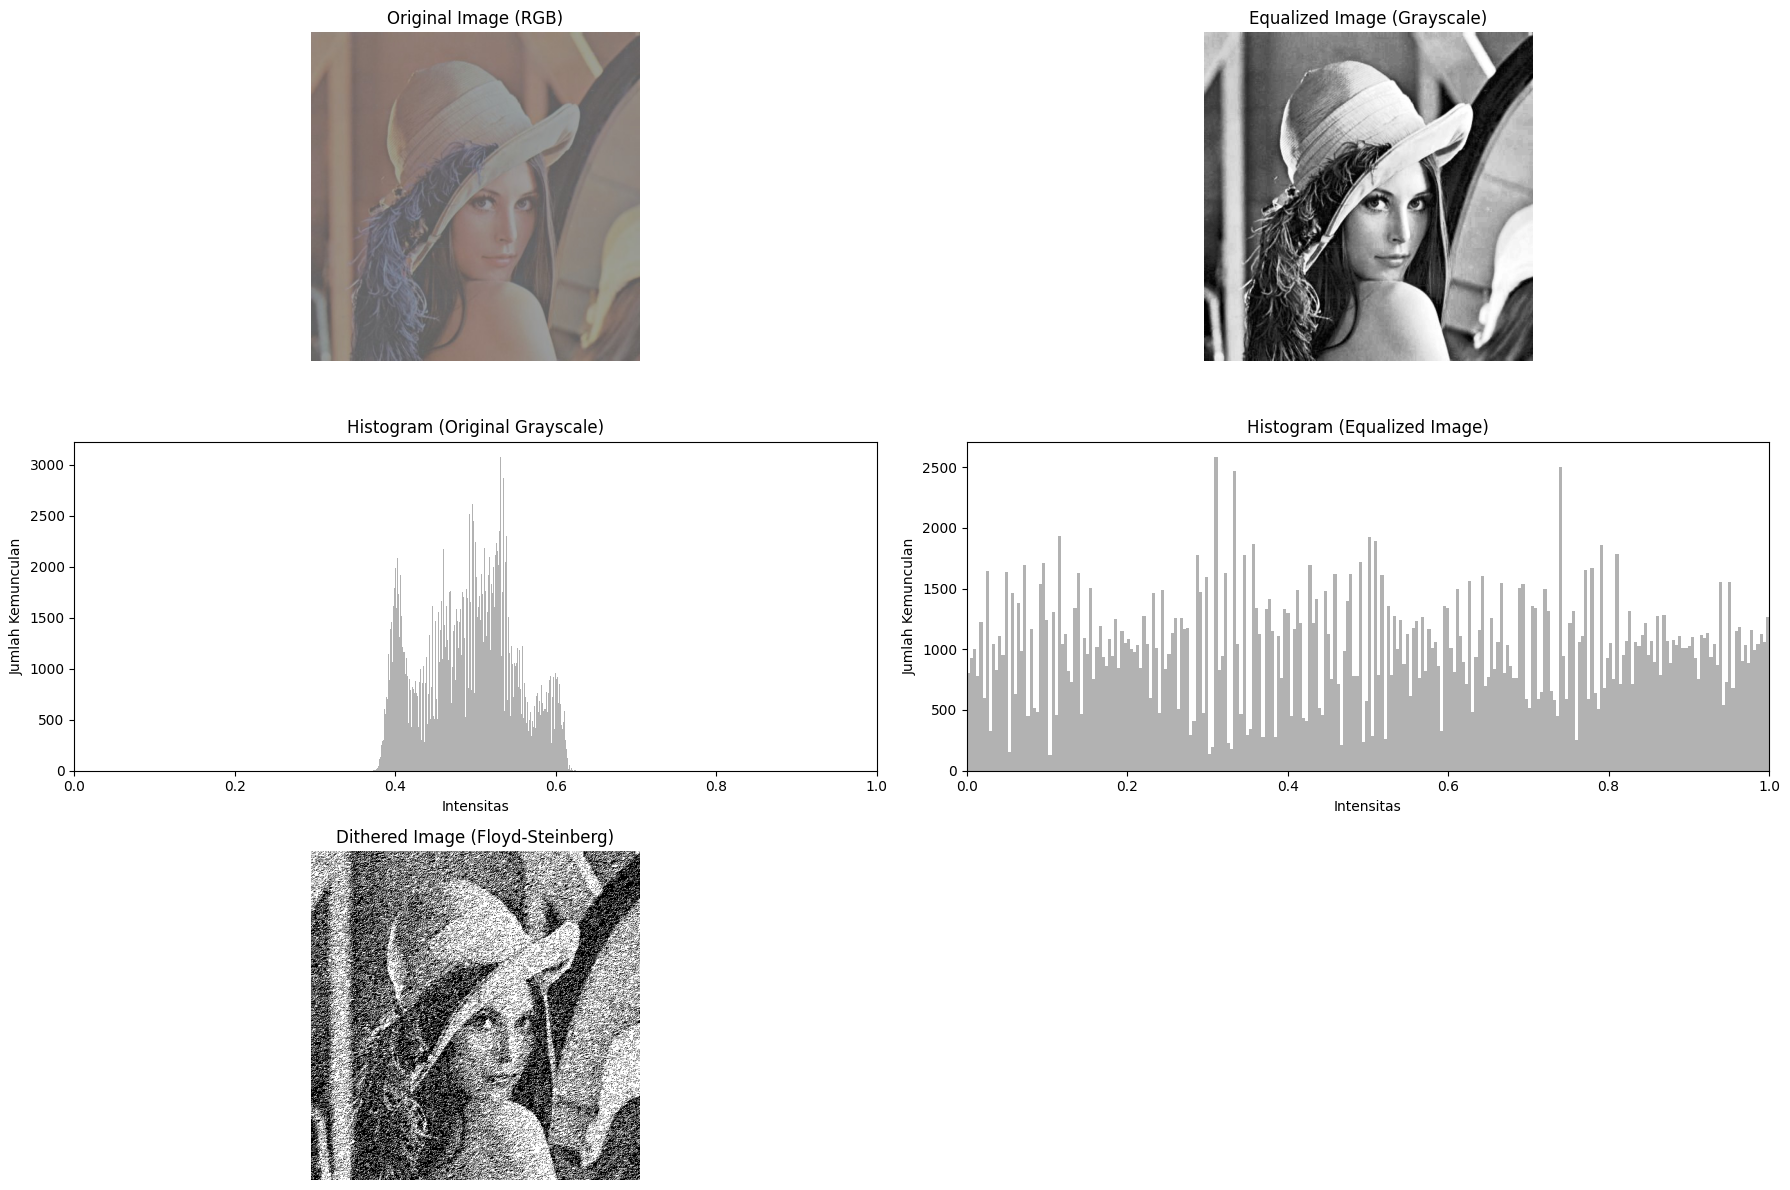

In [11]:
# 9
from skimage import exposure, color

img_path = "/content/drive/MyDrive/PCVK/lena_lc.jpg"
img = io.imread(img_path)

# 1. Convert to grayscale
gray_img = color.rgb2gray(img)

# 2. Apply histogram equalization
equalized_img = exposure.equalize_hist(gray_img)

def floyd_steinberg_dithering(image, error_weights=(7/16, 3/16, 5/16, 1/16)):
    img = image.copy() * 255  # Scale image to range 0-255
    img = img.astype(np.float32)  # Convert to float for better error handling
    h, w = img.shape

    for y in range(h):
        for x in range(w):
            old_pixel = img[y, x]
            new_pixel = np.round(old_pixel / 255) * 255  # Approximate to 0 or 255
            img[y, x] = new_pixel
            quant_error = old_pixel - new_pixel

            if x + 1 < w:
                img[y, x + 1] += quant_error * error_weights[0]  # Right
            if y + 1 < h:
                if x > 0:
                    img[y + 1, x - 1] += quant_error * error_weights[1]  # Below left
                img[y + 1, x] += quant_error * error_weights[2]  # Below
                if x + 1 < w:
                    img[y + 1, x + 1] += quant_error * error_weights[3]  # Below right

    return np.clip(img, 0, 255).astype(np.uint8)  # Clip to valid pixel range and convert to uint8


# Apply dithering on the histogram equalized image
dithered_img = floyd_steinberg_dithering(equalized_img, error_weights = (1.0, 0.8, 0.7, 0.5))

# Plot the results and histograms
plt.figure(figsize=(18, 12))

# Baris Pertama: Display original grayscale image dan histogram equalized image
plt.subplot(3, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image (RGB)')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image (Grayscale)')
plt.axis('off')

# Baris Kedua: Histogram of original grayscale image dan histogram equalized image
plt.subplot(3, 2, 3)
plt.hist(gray_img.ravel(), bins=256, color='gray', alpha=0.6)
plt.title('Histogram (Original Grayscale)')
plt.xlabel('Intensitas')
plt.ylabel('Jumlah Kemunculan')
plt.xlim(0, 1)

plt.subplot(3, 2, 4)
plt.hist(equalized_img.ravel(), bins=256, color='gray', alpha=0.6)
plt.title('Histogram (Equalized Image)')
plt.xlabel('Intensitas')
plt.ylabel('Jumlah Kemunculan')
plt.xlim(0, 1)

# Baris Ketiga: Display dithered image (Floyd-Steinberg)
plt.subplot(3, 2, 5)
plt.imshow(dithered_img, cmap='gray')
plt.title('Dithered Image (Floyd-Steinberg)')
plt.axis('off')

# Menyesuaikan tata letak agar tidak tumpang tindih
plt.tight_layout()

# Menampilkan hasil
plt.show()